1.   Посчитать tpr и fpr в ноутбуке к лекции.
2.   Убедиться, что график ROC AUC получается таким же, как и штатными средствами
3. Построить график Precision - Recall на этих же данных.




In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [4]:
#смотрим значение пустых строк
print(f"Для dob пустых строк: {len(data[pd.isnull(data['dob'])])}")
print(f"Для height пустых строк: {len(data[pd.isnull(data['height'])])}")
print(f"Для weight пустых строк: {len(data[pd.isnull(data['weight'])])}")
print(f"Общее число строк: {len(data)}")

Для dob пустых строк: 1
Для height пустых строк: 330
Для weight пустых строк: 659
Общее число строк: 11538


In [5]:
#обнуляем значение пустых строк
data = data[pd.isnull(data['height'] ) == 0 ]
data = data[pd.isnull(data['weight'] ) == 0 ]
data = data[pd.isnull(data['dob'] ) == 0 ]

In [6]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
       1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74, 1.6 ,
       2.07, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94, 1.88, 1.95,
       1.71, 1.84, 1.91, 2.02, 1.58, 1.63, 1.67, 1.79, 1.97, 1.56, 1.55,
       1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47, 1.52,
       2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11, 1.43,
       1.49, 1.33, 1.44, 2.13, 1.48, 2.09, 2.21, 2.18, 1.21, 1.38, 1.34,
       2.15, 2.17, 1.42, 1.4 , 2.14])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [8]:
#строим модель 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [9]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [10]:
y = data['sex']

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [12]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [13]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head()

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0


In [14]:
le.fit(data['sex'])

LabelEncoder()

In [15]:
y = pd.Series(data = le.transform(data['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [16]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
model.score(X_train, y_train)

0.7788157894736842

In [18]:
model.score(X_test, y_test)

0.7740945365254758

In [19]:
predictions = model.predict_proba(X_test)
predictions

array([[0.00783529, 0.99216471],
       [0.82759396, 0.17240604],
       [0.42007459, 0.57992541],
       ...,
       [0.76507353, 0.23492647],
       [0.48378675, 0.51621325],
       [0.65903154, 0.34096846]])

In [20]:
#прогнозные значения модели
for line in zip(predictions[:, 1][:10], y_test[:10]):
     print(line)

(0.9921647084489857, 1)
(0.17240603677635707, 0)
(0.5799254124668275, 1)
(0.31192928199508935, 1)
(0.12575811170645187, 0)
(0.1007746934309214, 0)
(0.19928319121997776, 0)
(0.407019985564842, 0)
(0.9697129402651864, 1)
(0.7919878001848103, 1)


In [21]:
#считаем accuracy
def metrics(predictions, Y_test, thres):
    
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    
    for predicted_prob, actual in zip(predictions[:, 1], Y_test):    
        if predicted_prob >= thres:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
          if actual == 1:
              fn += 1
          else:
              tn += 11
    
    return tp, fp, tn, fn

# Считаем tpr и fpr

In [22]:
tpr = []
fpr = []
precision = []
for thres in np.arange(0, 1, 0.08):
  tp, fp, tn, fn = metrics(predictions, y_test, thres)
  tpr.append(tp / (tp + fn))
  fpr.append(fp / (fp + tn))
  precision.append(tp / (tp + fp))
  print(f'tpr:{tpr}   fpr:{fpr}   precision:{precision}')

tpr:[1.0]   fpr:[1.0]   precision:[0.543585021485574]
tpr:[1.0, 0.9960474308300395]   fpr:[1.0, 0.49762513701132627]   precision:[0.543585021485574, 0.564299424184261]
tpr:[1.0, 0.9960474308300395, 0.9791078486730661]   fpr:[1.0, 0.49762513701132627, 0.1975623067127524]   precision:[0.543585021485574, 0.564299424184261, 0.6148936170212767]
tpr:[1.0, 0.9960474308300395, 0.9791078486730661, 0.9435347261434218]   fpr:[1.0, 0.49762513701132627, 0.1975623067127524, 0.10428375171724741]   precision:[0.543585021485574, 0.564299424184261, 0.6148936170212767, 0.6667996807661613]
tpr:[1.0, 0.9960474308300395, 0.9791078486730661, 0.9435347261434218, 0.9034443817052513]   fpr:[1.0, 0.49762513701132627, 0.1975623067127524, 0.10428375171724741, 0.061518712353115436]   precision:[0.543585021485574, 0.564299424184261, 0.6148936170212767, 0.6667996807661613, 0.7197480881691408]
tpr:[1.0, 0.9960474308300395, 0.9791078486730661, 0.9435347261434218, 0.9034443817052513, 0.8622247317899492]   fpr:[1.0, 0.49

# ROC AUG

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [24]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [25]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
  print(line)

(0.0, 0.0, 1.999885354844725)
(0.0, 0.000564652738565782, 0.9998853548447251)
(0.0, 0.00564652738565782, 0.998936497588392)
(0.0006724949562878278, 0.00564652738565782, 0.9988934645210445)
(0.0006724949562878278, 0.009599096555618294, 0.9980286092372256)
(0.0013449899125756557, 0.009599096555618294, 0.9978003679951698)
(0.0013449899125756557, 0.019762845849802372, 0.9954725854248796)
(0.0020174848688634837, 0.019762845849802372, 0.9954062245209019)
(0.0020174848688634837, 0.020327498588368152, 0.99534142321613)
(0.0026899798251513113, 0.020327498588368152, 0.9953044524686289)


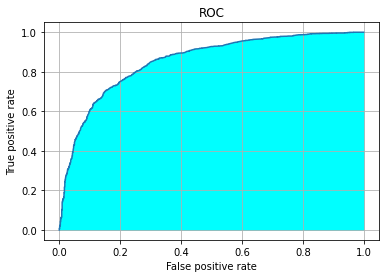

In [26]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.fill_between(fpr, tpr, np.zeros_like(tpr), color='cyan')
plt.grid()

In [27]:
fpr1, tpr1, thres = roc_curve(y_test, predictions[:, 1])

In [28]:
df_roc = pd.DataFrame({'prediction':predictions[:, 1], 'y_test':y_test})
df_roc.sort_values(by=['prediction'],ascending = False, inplace = True)

df_roc['y'] = df_roc['y_test'].cumsum()

df_roc['y_test_n'] = df_roc['y_test'].apply(lambda x: 1 if x == 0 else 0)
df_roc['n'] = df_roc['y_test_n'].cumsum()

y_sum = df_roc['y_test'].sum()
n_sum = df_roc['y_test_n'].sum()

df_roc['fpr'] = df_roc.n / n_sum
df_roc['tpr'] = df_roc.y / y_sum

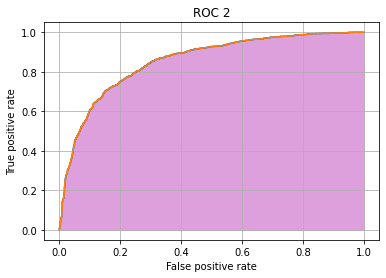

In [29]:
plt.plot( df_roc['fpr'], df_roc['tpr'] )
plt.plot( fpr1, tpr1 )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC 2')
plt.fill_between(df_roc['fpr'], df_roc['tpr'], np.zeros_like(df_roc['tpr']), color='plum')
plt.grid()

In [30]:
#площадь для ROC AUG
from sklearn.metrics import auc
print(auc(fpr, tpr))
print(auc(fpr1, tpr1))

#площадь и графики вышли одинаковыми

0.8538046848330172
0.8538046848330172


#Precision - Recall

In [31]:
from sklearn.metrics import precision_recall_curve

In [32]:
pr, rc, thres = precision_recall_curve(y_test, predictions[:, 1])
for line in zip(pr[:10], rc[:10], thres[:10]):
    print(line)

(0.5517133956386293, 1.0, 0.051043032968133395)
(0.5515736989716422, 0.9994353472614342, 0.05115207878382112)
(0.5517456359102244, 0.9994353472614342, 0.0513270487937523)
(0.5519176800748363, 0.9994353472614342, 0.051538919188713096)
(0.5520898315658141, 0.9994353472614342, 0.051990883449470726)
(0.5522620904836193, 0.9994353472614342, 0.05404794178910899)
(0.552434456928839, 0.9994353472614342, 0.05445542544487056)
(0.5526069310021855, 0.9994353472614342, 0.054931484383652494)
(0.5532979055954986, 0.9994353472614342, 0.05534523959699739)
(0.5534709193245778, 0.9994353472614342, 0.05596966829046062)


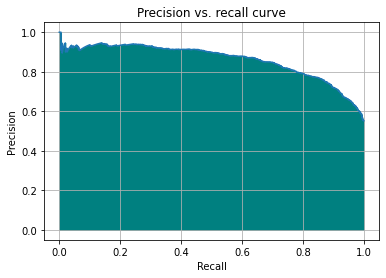

In [33]:
plt.plot(rc, pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. recall curve')
plt.fill_between(rc, pr, np.zeros_like(pr), color='teal')
plt.grid()

In [34]:
#площдь под кривой
from sklearn.metrics import average_precision_score
average_precision_score(y_test, predictions[:, 1])

0.8612377231887747